In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from spotipy import Spotify
from spotipy.oauth2 import SpotifyClientCredentials
from collections import Counter
from data_beats import *
import dotenv

In [3]:
# Variables de entorno
dotenv.load_dotenv()
os.environ['SPOTIPY_CLIENT_ID'] = os.getenv('SPOTIPY_CLIENT_ID')
os.environ['SPOTIPY_CLIENT_SECRET'] = os.getenv('SPOTIPY_CLIENT_SECRET')
playlist_id = os.getenv('PLAYLIST_ID')

In [ ]:
# Autenticación con Spotify
auth_manager = SpotifyClientCredentials()
sp = Spotify(auth_manager=auth_manager)

In [5]:
# Ejecutar la extracción
all_tracks, playlist_name = get_all_playlist_tracks(sp, playlist_id)

🎵 Playlist: más chill
📊 Total de canciones: 54
⏳ Extrayendo todas las canciones...



Extrayendo: 100%|██████████| 54/54 [00:00<00:00, 76.09it/s] 

✅ 54 canciones extraídas exitosamente


In [ ]:
# Armo el dataframe final con los datos
df = create_df(all_tracks)

Procesando datos: 100%|██████████| 54/54 [00:00<00:00, 855.27it/s]

🎉 DataFrame final creado


In [ ]:
# Guardo el dataframe
# csv_filename = 'playlist_data_beats.csv'
# csv_path = "dataset.csv"
# df.to_csv(csv_path, index=False)
# print(f"Archivo guardado: {csv_path}")

Archivo guardado: dataset.csv


# EDA

#### Evolución de canciones agregadas en el tiempo
¿En qué años/meses se agregaron más canciones?

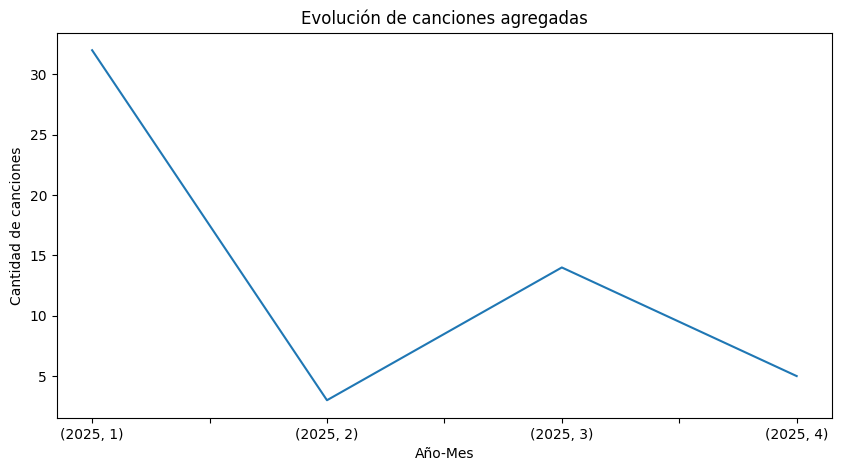

In [8]:
df.groupby(['added_year', 'added_month']).size().plot(kind='line', figsize=(10,5))
plt.title("Evolución de canciones agregadas")
plt.xlabel("Año-Mes")
plt.ylabel("Cantidad de canciones")
plt.show()

#### Heatmap de actividad por día y hora
¿En qué momento del día y qué día de la semana agregas más canciones?

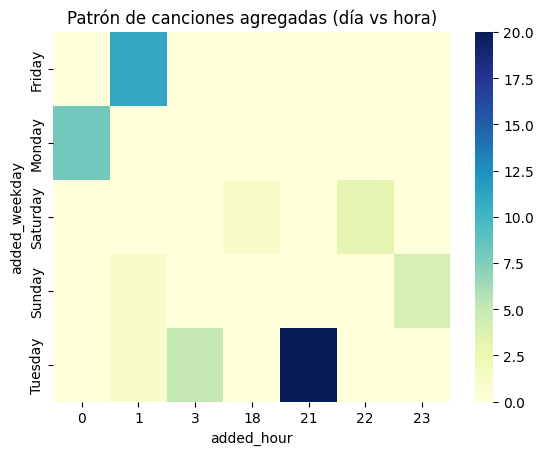

In [9]:
pivot = df.pivot_table(index='added_weekday', columns='added_hour', values='track_id', aggfunc='count').fillna(0)
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Patrón de canciones agregadas (día vs hora)")
plt.show()

#### Popularidad de las canciones a lo largo del tiemmpo
¿Los gustos se inclinan más hacia la música popular o underground?

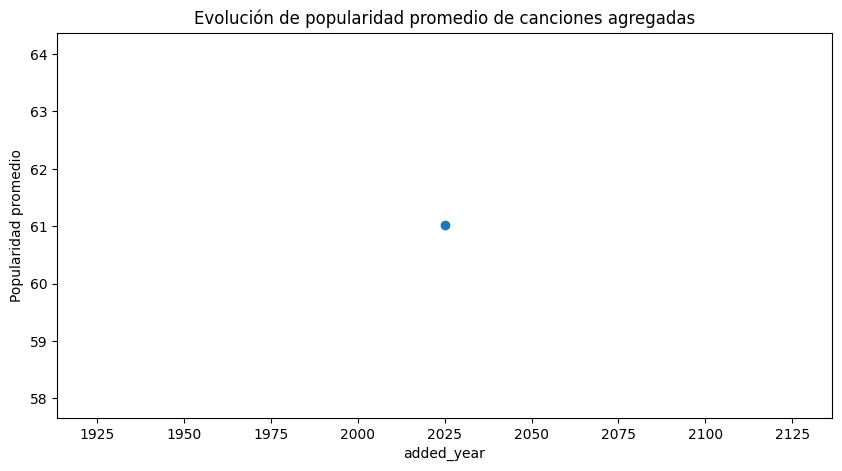

In [13]:
df.groupby('added_year')['popularity'].mean().plot(kind='line', marker='o', figsize=(10,5))
plt.title("Evolución de popularidad promedio de canciones agregadas")
plt.ylabel("Popularidad promedio")
plt.show()

#### Duración de canciones: preferencia por época
¿Cambia la duración promedio de las canciones que agrega?

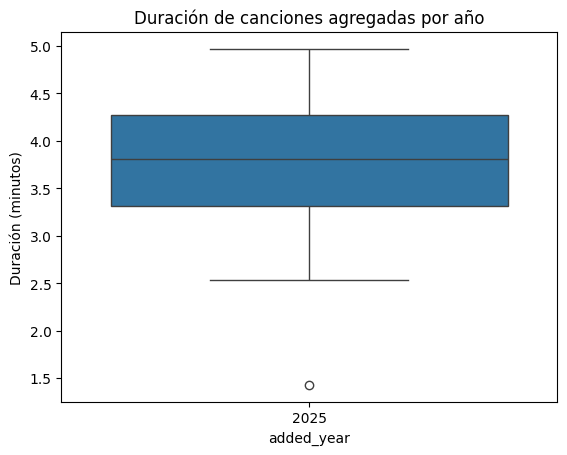

In [14]:
sns.boxplot(x='added_year', y='duration_minutes', data=df)
plt.title("Duración de canciones agregadas por año")
plt.ylabel("Duración (minutos)")
plt.show()

#### Top artistas
¿Qué artistas dominan la playlist?

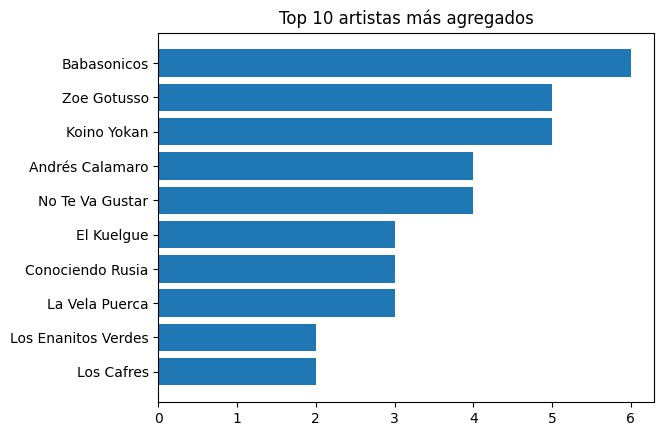

In [16]:
top_artists = Counter(", ".join(df['artists']).split(", ")).most_common(10)
artists, counts = zip(*top_artists)

plt.barh(artists[::-1], counts[::-1])  # invertido para que el top quede arriba
plt.title("Top 10 artistas más agregados")
plt.show()